In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
Cal_data = pd.read_csv('/content/sample_data/calories.csv')
Exe_data = pd.read_csv('/content/sample_data/exercise.csv')

In [3]:
Cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [4]:
Exe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [5]:
C_data = pd.concat([Exe_data,Cal_data['Calories']],axis = 1)
C_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
C_data.isnull().sum()

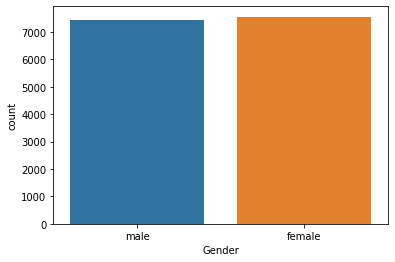

In [12]:
sns.countplot(x='Gender',data=C_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


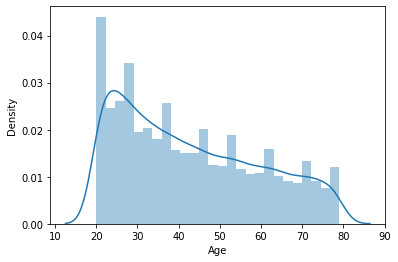

In [13]:
sns.distplot(C_data['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


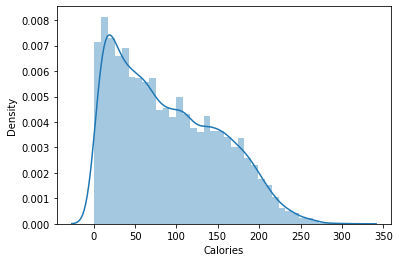

In [14]:
sns.distplot(C_data['Calories'])
plt.show()

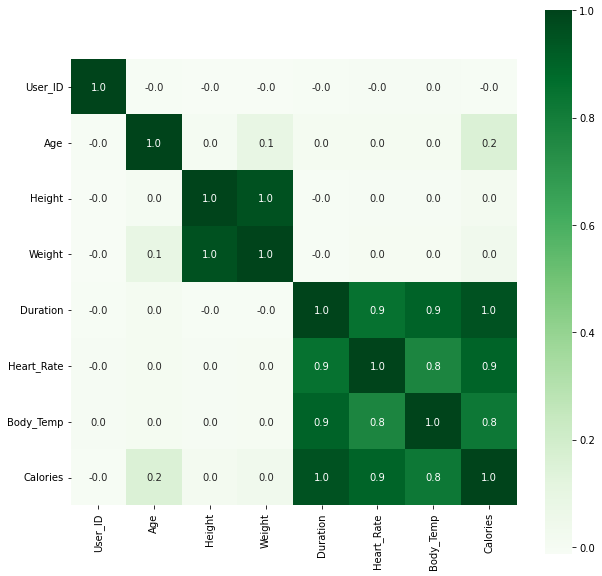

In [24]:
corelation = C_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Greens')

In [25]:
C_data.replace({'Gender': {'male':0, 'female':1}},inplace=True)

In [26]:
X = C_data.drop(columns=['Calories','User_ID'],axis=1)
Y = C_data['Calories']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
model = XGBRegressor()
model.fit(x_train,y_train)

[15:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [31]:
ypre = model.predict(x_train)
ypre_1 = model.predict(x_test)

error = metrics.mean_absolute_error(y_train,ypre)
error_1 = metrics.mean_absolute_error(y_test,ypre_1)

print(error, error_1)

2.5767704472566644 2.7159012502233186


In [32]:
e = metrics.r2_score(y_train,ypre)
e_1 = metrics.r2_score(y_test,ypre_1)
print(e, e_1)

0.9966777021480265 0.9963065655529431
